# Info
Purpose:

    Describe the details ...

Input:

    arguments

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - hdf5storage
    - scipy

Needed Files:
  - file.rc : for consistent creation of look of matplotlib figures
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2021-10-15
    Modified:


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os


In [2]:
name = 'ORACLES'
vv = 'v1'
fp = getpath(name)


Return path named:  ORACLES /data/sam/ORACLES/


In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
import cartopy

In [72]:
import importlib
importlib.reload(ccrs)

AttributeError: module 'cartopy.trace' has no attribute 'PROJ_VERSION'

# Test out the cartopy plotting

In [5]:
mrc = ccrs.Mercator()

In [6]:
lower_left = [-92,30]
upper_right = [-65,50]

<IPython.core.display.Javascript object>


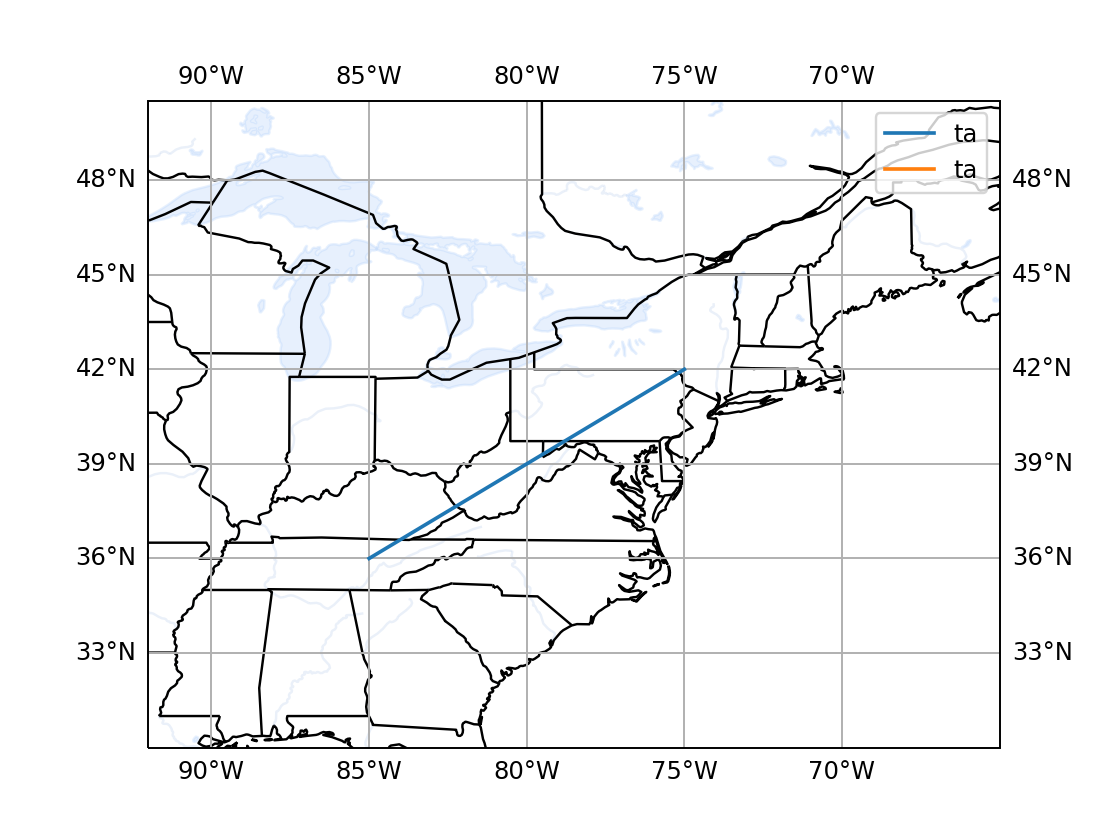

In [25]:
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='k',
                                        facecolor=cfeature.COLORS['land']+0.0625)
provinces_50m = cfeature.NaturalEarthFeature('cultural','admin_1_states_provinces_lines','50m',facecolor='none')
gl = ax.gridlines(draw_labels=True,auto_update=True)
#mland = ax.add_feature(land_50m,zorder=-100)
ax.add_feature(cfeature.LAKES, facecolor=[0.69375   , 0.81484375, 0.9828125 ],alpha=0.3)
ax.add_feature(cfeature.RIVERS, facecolor=[0.69375   , 0.81484375, 0.9828125 ],alpha=0.2)
ax.add_feature(provinces_50m)
ax.add_feature(cfeature.BORDERS)

ax.set_extent([lower_left[0], upper_right[0],lower_left[1],upper_right[1]])

In [89]:
ax.figure.canvas.copy_from_bbox(ax.axes.bbox)

In [50]:
lo = ax.plot([-85.0,-80,-75],[36,39,42],label='ta')

In [51]:
leg = ax.legend()

In [52]:
li = leg.get_lines()

In [53]:
li[0]

In [55]:
lo[0].set_visible(False)
ax.get_lines()

<a list of 2 Line2D objects>

In [56]:
lu = ax.get_lines()

In [70]:
isVisible

False

In [69]:
if li[0].get_alpha() is not None and li[0].get_alpha()>0.3: 
    isVisible=True
else: isVisible=False

In [86]:
True if lo[0].get_alpha() is None else (True if lo[0].get_alpha() else False)

False

In [82]:
True if li[0].get_alpha() else False

False

In [85]:
lo[0].set_alpha(0.0)

# Plot out data

In [15]:
ax.axes.lines

[]

# Test out url reading

In [34]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [27]:
url = 'http://aeronet.gsfc.nasa.gov/cgi-bin/print_web_data_v2_globe?year=2021&month=10&day=20&year2=2021&month2=10&day2=20&LEV10=1&AVG=20&lat1=30.000000&lat2=50.519141&lon1=-92.000000&lon2=-65.000000'

In [28]:
htm = urlopen(url)

In [29]:
htm

In [30]:
html = htm.read()

In [35]:
soup = BeautifulSoup(html)

In [36]:
soup

<html> <head> <title>AERONET Data Download (Version 2 Direct Sun)</title><h2>AERONET Data Download (Version 2 Direct Sun)</h2>
</head>
<body bgcolor="#FFFFFF">Level 1.0. Real Time Data.<p>The Following data are unscreened and may not have final calibration applied.
Version 2 AOT Algorithm
AOD Level 1.0,Daily Averages,UNITS can be found at,,, http://aeronet.gsfc.nasa.gov/new_web/units.html<br/>
AERONET_Site_Name,Longitude,Latitude,Elevation(m),Principal_Investigator,PI_Email,Date(dd-mm-yy),Time(hh:mm:ss),Julian_Day,AOT_1640,AOT_1020,AOT_870,AOT_675,AOT_667,AOT_555,AOT_551,AOT_532,AOT_531,AOT_500,AOT_490,AOT_443,AOT_440,AOT_412,AOT_380,AOT_340,Water(cm),%TripletVar_1640,%TripletVar_1020,%TripletVar_870,%TripletVar_675,%TripletVar_667,%TripletVar_555,%TripletVar_551,%TripletVar_532,%TripletVar_531,%TripletVar_500,%TripletVar_490,%TripletVar_443,%TripletVar_440,%TripletVar_412,%TripletVar_380,%TripletVar_340,%WaterError,440-870Angstrom,380-500Angstrom,440-675Angstrom,500-870Angstrom,340-44